1. We'll try to use the matrix multiplication method to get pi_i (where i = #customers < 10, 15, 20, 25)
2. Now use E[N <= i] = sum_{i = 0, i}i.pi_1
3. Use Little's law to get E[T | N <= i]

This code is for H2/H2/1

I'll select the ST and IAT parameters ensuring they are from the tails
Remembering mean ST = 1 and mean IAT = 2.5, any Kurtosis value > 20 for either of them should be in the tail 

For this specififc set of results, mu_kurt = 26.169 and lam_kurt = 70.733 and 7.29

Parameters for IAT 70 kurtosis : 
lam1 = 2.248023
lam2 = 0.039512

mu1 = 2.04463
mu2 = 0.15960
p =  0.9173
q =  0.7815

Parameters for IAT 7 kurtosis : 
lam1 = 2.248023
lam2 = 0.039512

mu1 = 2.04463
mu2 = 0.15960
p =  0.3
q =  0.7815

In [35]:
def calculatecoeff_var(lam1, lam2, p) :
    dist_mean =  p/lam1+ (1-p)/lam2
    dist_var = (2*p/lam1**2 + 2*(1-p)/lam2**2) - dist_mean**2
    dist_sd = abs(np.sqrt(dist_var))
    
    if (dist_sd / dist_mean) >= 1 :
        return(dist_sd/dist_mean)
    else :
        print("Please check your inputs. Coefficient of variance < 1")
        return -100

In [36]:
print(calculatecoeff_var(1.387431, 0.128715, 0.747565))


1.9999994184216088


In [260]:
#H2/H2/1 MA code (with kurta = 70)

import numpy as np

#Declaring parameters
lam1 = 154.484616
lam2 = 0.159750

mu1 = 2.04463
mu2 = 0.15960
p =  0.601244
q =  0.7815

b1 = mu1*(1-q)
b2 = mu2*(1-q)
b3 = mu1*q
b4 = mu2*q
f1 = lam1*(1-p)
f2 = lam2*(1-p)
f3 = lam1*p
f4 = lam2*p

In [252]:
#H2/H2/1 MA code (with kurta = 7)

import numpy as np

#Declaring parameters
lam1 = 0.429418
lam2 = 0.157934

mu1 = 2.04463
mu2 = 0.15960
p =  0.957215
q =  0.7815

b1 = mu1*(1-q)
b2 = mu2*(1-q)
b3 = mu1*q
b4 = mu2*q
f1 = lam1*(1-p)
f2 = lam2*(1-p)
f3 = lam1*p
f4 = lam2*p

In [261]:
#Initializing forward, backward and initial arrays
L_0 = np.transpose(np.array([[-(lam1), 0],
               [0, -(lam2)]]))
print("L :", L_0)
#F_0 = np.array([[lam1*p*q, lam1*(1-p)*q, lam1*p*(1-q), lam1*(1-p)*(1-q)],
#             [lam2*(1-p)*(1-q), lam2*p*(1-q), lam2*p*q, lam2*(1-p)*q]])
F_0 = np.array([[lam1*p*q, lam1*(1-p)*q, lam1*p*(1-q), lam1*(1-p)*(1-q)],
              [lam2*(p)*(q), lam2*(1-p)*(q), lam2*(p)*(1-q), lam2*(1-p)*(1-q)]])
               #[lam2*(1-p)*(1-q), lam2*(p)*(1-q), lam2*(1-p)*(q), lam2*(p)*(q)]])
print("F_0 :",F_0)
B_0 = np.array([[mu1, 0],
               [mu1, 0],
               [0, mu2],
               [0, mu2]])
print(B_0)
L = np.array([[-(lam1 + mu1), 0, 0, 0],
             [0, -(lam2 + mu1), 0, 0],
             [0, 0, -(lam1 + mu2), 0],
             [0, 0, 0, -(lam2 + mu2)]])
L1 = np.array([[-(lam2 + mu2), 0, 0, 0],
             [0, -(lam2 + mu2), 0, 0],
             [0, 0, -(lam1 + mu2), 0],
             [0, 0, 0, -(lam2 + mu2)]])
print("L :",L)
print(L1)
F = np.array([[f3, f1, 0, 0],
             [f4, f2, 0, 0],
             [0, 0, f3, f1],
             [0, 0, f4, f2]])
print("F :",F)
B = np.array([[b3, 0, b1, 0],
             [0, b3, 0, b1],
             [b4, 0, b2, 0],
             [0, b4, 0, b2]])
B1 = np.array([[mu1*(q), 0, mu1*(1-q), 0],
             [0, mu1*(q), 0, mu1*(1-q)],
             [mu2*(q), 0, mu2*(1-q), 0],
             [0, mu2*(q), 0, mu2*(1-q)]])
print("B :",B)
print(B1)
R_0 = np.zeros((4, 4))
print(R_0)

L : [[-154.484616    0.      ]
 [   0.         -0.15975 ]]
F_0 : [[7.25880242e+01 4.81417032e+01 2.02949242e+01 1.34599644e+01]
 [7.50620817e-02 4.97825433e-02 2.09866473e-02 1.39187277e-02]]
[[2.04463 0.     ]
 [2.04463 0.     ]
 [0.      0.1596 ]
 [0.      0.1596 ]]
L : [[-156.529246    0.          0.          0.      ]
 [   0.         -2.20438     0.          0.      ]
 [   0.          0.       -154.644216    0.      ]
 [   0.          0.          0.         -0.31935 ]]
[[  -0.31935     0.          0.          0.      ]
 [   0.         -0.31935     0.          0.      ]
 [   0.          0.       -154.644216    0.      ]
 [   0.          0.          0.         -0.31935 ]]
F : [[9.28829485e+01 6.16016675e+01 0.00000000e+00 0.00000000e+00]
 [9.60487290e-02 6.37012710e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.28829485e+01 6.16016675e+01]
 [0.00000000e+00 0.00000000e+00 9.60487290e-02 6.37012710e-02]]
B : [[1.59787835 0.         0.44675166 0.        ]
 [0.     

In [262]:
# Computing matrix R
R_prev = R_0
n = 0
flag = 0

while flag == 0 :
    diff = []
    if n > 0:
        R_prev = R

    R_2 = np.matmul(R_prev,R_prev)
    R_mid = -(np.matmul(R_2,B) + F)
    #print(R_mid)
    R = np.matmul(R_mid, np.linalg.inv(L))
    
    for (i,j) in zip(R_prev, R) :
        for (k,l) in zip(i,j) :
            diff.append(abs(k-l))
     
    max = np.max(diff)
    #print("Max is", max)
    if (max < 10**-7) :
    
        flag =1
        break
    n += 1
print(R,n)

[[5.97509724e-01 6.88034838e+01 1.16576913e-03 7.88538592e+01]
 [6.17874976e-04 7.11485508e-02 1.20550268e-06 8.15414786e-02]
 [7.76701176e-04 5.25368904e+01 6.00843294e-01 2.94289658e+02]
 [8.03173908e-07 5.43275341e-02 6.21322166e-04 3.04320094e-01]] 258


In [263]:
#Computing steady state distribution for state 0 and 1

#Creating (I - R)^-1 = psi
I = np.identity(4)
psi_full = np.linalg.inv(I - R)
psi = np.matmul(psi_full,np.ones((4,1), dtype=np.int64))
psi = np.vstack([np.ones((2,1), dtype=np.int64), psi])
print(psi)

#Creating L + RB
RB = np.matmul(R, B)
LRB = np.add(L, RB)
print(LRB)

#Creating stacked version of [F_0  L+RB]T = phi
phi = np.vstack([F_0, LRB])
print(phi)

#Solving for pi_0 and pi_1
A = np.array([0, -(lam2), 0, 0, mu2, mu2])
A = A[..., None] 

A = np.hstack([psi,A, phi])
b = np.array([1, 0, 0, 0, 0, 0])
print(A,b)
"""
steady_pi = np.linalg.solve(np.transpose(A), b)
print(steady_pi)
"""
steady_pi = np.matmul(b, np.linalg.inv(A)) 
print(type(steady_pi))
print(steady_pi)
print(b.shape)


[[1.00000000e+00]
 [1.00000000e+00]
 [1.59391421e+03]
 [2.64720638e+00]
 [4.58999232e+03]
 [5.74540147e+00]]
[[-1.55574353e+02  1.19774834e+02  2.66979112e-01  3.34879094e+01]
 [ 9.87439404e-04 -2.08052281e+00  2.76078707e-04  3.46292962e-02]
 [ 7.61826958e-02  1.20653543e+02 -1.54622916e+02  3.37335883e+01]
 [ 7.87792725e-05  1.24765844e-01  2.20259386e-05 -2.84466651e-01]]
[[ 7.25880242e+01  4.81417032e+01  2.02949242e+01  1.34599644e+01]
 [ 7.50620817e-02  4.97825433e-02  2.09866473e-02  1.39187277e-02]
 [-1.55574353e+02  1.19774834e+02  2.66979112e-01  3.34879094e+01]
 [ 9.87439404e-04 -2.08052281e+00  2.76078707e-04  3.46292962e-02]
 [ 7.61826958e-02  1.20653543e+02 -1.54622916e+02  3.37335883e+01]
 [ 7.87792725e-05  1.24765844e-01  2.20259386e-05 -2.84466651e-01]]
[[ 1.00000000e+00  0.00000000e+00  7.25880242e+01  4.81417032e+01
   2.02949242e+01  1.34599644e+01]
 [ 1.00000000e+00 -1.59750000e-01  7.50620817e-02  4.97825433e-02
   2.09866473e-02  1.39187277e-02]
 [ 1.59391421e+03

In [264]:
#Computing the pi_i using the recursive expression pi_i+1 = pi_i*R^i
steady_pi = steady_pi.tolist()    
steady_pi = [[steady_pi[0], steady_pi[1]], [steady_pi[2], steady_pi[3], steady_pi[4], steady_pi[5]]]
steady_prob_unified = []

def compute_pi_1(steady_pi) :
    #steady_prob = [steady_pi[2], steady_pi[3], steady_pi[4], steady_pi[5]]
    steady_prob = steady_pi[1]
    R_power = R
    state_num = 2
    
    while state_num <= 25 :
        
        steady_prob = np.matmul(steady_prob,R_power)
        #print("steady prob",steady_prob.tolist())
        R_power = np.matmul(R_power,R)
        
         
        steady_pi.append(steady_prob.tolist())
        
        state_num += 1
    #print(steady_prob)
    steady_prob_unified = [sum(x) for x in steady_pi]
    
        
    return steady_pi, steady_prob_unified
    

#steady_pi gives [[2 steady state probs for #req =  0], [4 steady state probs for #req =  1], .....]
#steady_prob_unified gives [sum of all the lists of steady_pi, that is, steady state prob for states 0, 1, 2,....]

In [265]:
#Average arrival rate 

lam_avg = p/(lam1) + (1-p)/(lam2)
lam_avg

2.5000171300745913

[0.05340798369401938, 0.08076893595777657, 0.07177792369387012, 0.05831476066430129, 0.04442980732457999, 0.03183364705677537, 0.021257282334708392, 0.013141480302487102, 0.007503643027798836, 0.003955230165381688, 0.0019244752087211004, 0.0008643525941228969, 0.0003583500175988836, 0.00013713925427719684, 4.8445562159530245e-05, 1.5797344125496804e-05, 4.755016416044514e-06, 1.321167328013987e-06, 3.388453206818593e-07, 8.022006743932808e-08, 1.7530827472057455e-08, 3.53638607197056e-09, 6.584984999151076e-10, 1.1318471230053382e-10, 1.79580268006637e-11, 2.6300700893122404e-12]


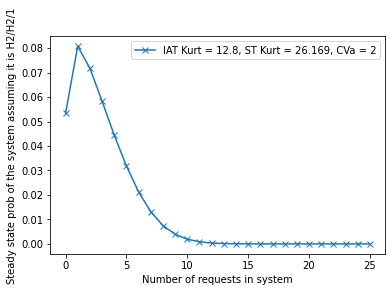

In [266]:
#Plotting the steady state probs vs num of requests

import matplotlib.pyplot as plt
steady_prob_unified_stored = []
steady_pi_stored = []

steady_pi_stored , steady_prob_unified_stored = compute_pi_1(steady_pi)
print(steady_prob_unified_stored)

plt.plot(steady_prob_unified_stored, marker = "x", label = "IAT Kurt = 12.8, ST Kurt = 26.169, CVa = 2")
plt.xlabel("Number of requests in system")
plt.ylabel("Steady state prob of the system assuming it is H2/H2/1")
plt.legend()

[0.6561230819002966, 0.20740715002380813, 0.07905940240506154, 0.01396077563177054, 0.001175630844798554, 4.4512982004304563e-05, 7.448689087417919e-07, 5.500679814911053e-09, 1.7925692663508922e-11, 2.577854047525679e-14, 1.635925420795293e-17, 4.581328930966637e-21, 5.66163992545192e-25, 3.087562896557191e-29, 7.430399744916024e-34, 7.890987249308308e-39, 3.6980544532173447e-44, 7.647827070323103e-50, 6.9795209329598935e-56, 2.8108389717211466e-62, 4.995386730212625e-69, 3.917644848094078e-76, 1.3558255287045834e-83, 2.0706435719358195e-91, 1.395499507029448e-99, 4.150274515953977e-108]


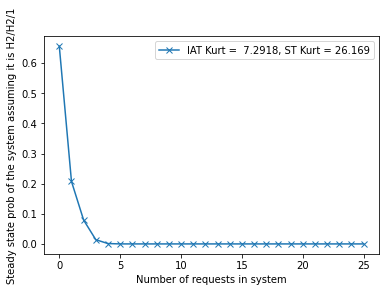

In [199]:
import matplotlib.pyplot as plt
steady_prob_unified_stored = []
steady_pi_stored = []

steady_pi_stored , steady_prob_unified_stored = compute_pi_1(steady_pi)
print(steady_prob_unified_stored)

plt.plot(steady_prob_unified_stored, marker = "x", label = "IAT Kurt =  7.2918, ST Kurt = 26.169")
plt.xlabel("Number of requests in system")
plt.ylabel("Steady state prob of the system assuming it is H2/H2/1")
plt.legend()

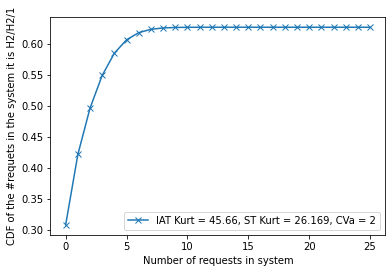

In [250]:
def compute_CDF(steady_prob_unified_stored) :
    CDF_arr = [0 for x in range(26)]
    i = 0
    while i <= 25 :
        j = 0
        
        while j <= i :
            CDF_val = steady_prob_unified_stored[j]
            CDF_arr[i] += CDF_val
            j+= 1
        
        i += 1
    #print(CDF_arr)
    return CDF_arr
        
CDF_arr = compute_CDF(steady_prob_unified_stored)  
plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 45.66, ST Kurt = 26.169, CVa = 2")
plt.xlabel("Number of requests in system")
plt.ylabel("CDF of the #requets in the system it is H2/H2/1")
plt.legend()

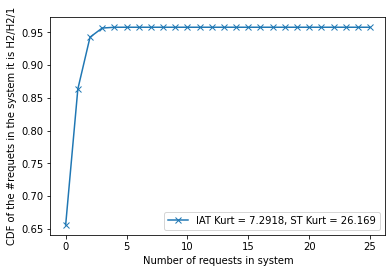

In [200]:

def compute_CDF(steady_prob_unified_stored) :
    CDF_arr = [0 for x in range(26)]
    i = 0
    while i <= 25 :
        j = 0
        
        while j <= i :
            CDF_val = steady_prob_unified_stored[j]
            CDF_arr[i] += CDF_val
            j+= 1
        
        i += 1
    #print(CDF_arr)
    return CDF_arr
        
CDF_arr = compute_CDF(steady_prob_unified_stored)  
plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 7.2918, ST Kurt = 26.169")
plt.xlabel("Number of requests in system")
plt.ylabel("CDF of the #requets in the system it is H2/H2/1")
plt.legend()

In [208]:
expected_len = [[0]] #Compute the expected len of the queue from 1 to 25 using steady state probs
expected_RT = [[0]]

steady_pi, steady_prob_unified = compute_pi_1(steady_pi)
print(steady_pi)

def compute_Ni(steady_pi) :
    state_len = 1
    Ni = 0
    #CDF_arr = compute_CDF(steady_prob_unified_stored)
    while state_len <= 25 :
        
        Ni += state_len * np.matmul(steady_pi[state_len], np.ones((4,1), dtype=int))
        #expected_len[i] = avglen
        Wi = lam_avg * Ni
        #print(Wi)
      
        expected_len.append(Ni.tolist())
        expected_RT.append(Wi.tolist())
        
        
        state_len += 1

    #print("Expected len prb",expected_len)
    #print("Expected RT",expected_RT)
    
    return  expected_len, expected_RT


[[0.05278912602484618, 0.6033339558754504], [0.008438941108139239, 0.049601471669109984, 0.004206759798401243, 0.14515997744815767], [0.0016076513190173632, 0.010861837212036214, 0.0019652580130944002, 0.06462465586091357], [6.948139987643509e-05, 0.0008460476985678214, 0.00039523561944956274, 0.01265001091387672], [1.8824908198891352e-06, 5.140344016153882e-05, 3.417474087430943e-05, 0.0010881701729428166], [5.962601109779507e-08, 1.8880392743427827e-06, 1.2965794010380925e-06, 4.126873731782589e-05], [9.91749711714174e-10, 3.1563885682909207e-08, 2.1697982186565476e-08, 6.90615291160603e-07], [7.323270845171541e-12, 2.330889672001403e-10, 1.602345672454765e-10, 5.100033009620264e-09], [2.3865168197050063e-14, 7.59593552520738e-13, 5.221746611662757e-13, 1.662005928162486e-11], [3.4319968288747693e-17, 1.0923546165390982e-15, 7.509277823084833e-16, 2.390093810812046e-14], [2.1779708055347277e-20, 6.932163934705361e-19, 4.765443759079439e-19, 1.5167713730519102e-17], [6.099300454262900

[[0], [0.08408277491956699], [0.23844029294514768], [0.4427802063455265], [0.6818331977420536], [0.9413036081614857], [1.2050982541874184], [1.457850588706686], [1.6874766164034436], [1.8862130050457198], [2.050613068153699], [2.180907177781528], [2.280014666721157], [2.352462386332172], [2.4034105524585856], [2.4379069658984704], [2.4604103505772574], [2.474561280198479], [2.483143107183508], [2.488164163149083], [2.4909992650960215], [2.4925445843453913], [2.493357873250043], [2.4937712406862818], [2.4939741812850595], [2.4940704333347457]]


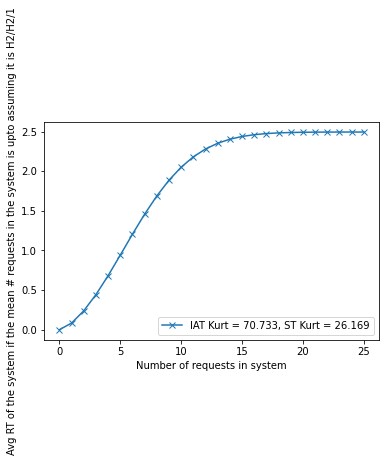

In [192]:
import matplotlib.pyplot as plt

#expected_len = []
#expected_RT = []

expected_len , expected_RT = compute_Ni(steady_pi)
steady_pi = [x[0] for x in expected_RT]
#expected_RT.pop(0)
#expected_RT.insert(0, 0)
print(expected_RT)
plt.plot(expected_RT, marker = "x", label = "IAT Kurt = 70.733, ST Kurt = 26.169")
plt.xlabel("Number of requests in system")
plt.ylabel("Avg RT of the system if the mean # requests in the system is upto assuming it is H2/H2/1")
plt.legend()

[[0], [3.7021320645384934], [6.5244875003412846], [7.272069757359992], [7.356007859707757], [7.3599805515351], [7.360060325151504], [7.360061012445562], [7.360061015005292], [7.360061015009433], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436], [7.360061015009436]]


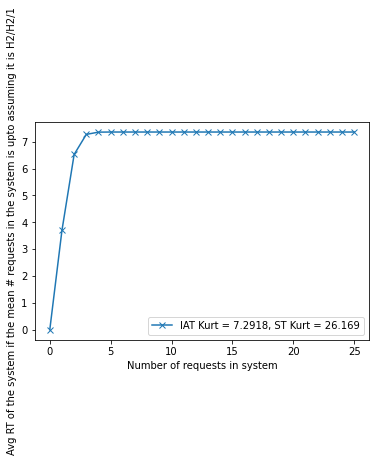

In [209]:
import matplotlib.pyplot as plt

#expected_len = []
#expected_RT = []

expected_len , expected_RT = compute_Ni(steady_pi)
steady_pi = [x[0] for x in expected_RT]
#expected_RT.pop(0)
#expected_RT.insert(0, 0)
print(expected_RT)
plt.plot(expected_RT, marker = "x", label = "IAT Kurt = 7.2918, ST Kurt = 26.169")
plt.xlabel("Number of requests in system")
plt.ylabel("Avg RT of the system if the mean # requests in the system is upto assuming it is H2/H2/1")
plt.legend()

Observations :
1. the CDF of the avg len looks like exp
2. high kurt IAT (long tail) => higher chance of picking higher value IAT => higher chance of low RT =>
   till almost <=15 requests RT value reaches. RT value rises sharply in the low Kurt IAT dis3
3. higher kurt IAT => accomodates more mean length at steady state => maybe explains point 2 by Little's Law

# Same code , to overcast multiple CDFs

In [40]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [86]:
def compute_pi_1(steady_pi) :
    #steady_prob = [steady_pi[2], steady_pi[3], steady_pi[4], steady_pi[5]]
    steady_prob = steady_pi[1]
    R_power = R
    state_num = 2
    
    while state_num <= 25 :
        
        steady_prob = np.matmul(steady_prob,R_power)
        #print("steady prob",steady_prob.tolist())
        R_power = np.matmul(R_power,R)
        
         
        steady_pi.append(steady_prob.tolist())
        
        state_num += 1
    #print(steady_prob)
    steady_prob_unified = [sum(x) for x in steady_pi]
    
        
    return steady_pi, steady_prob_unified

In [90]:
def compute_CDF(steady_prob_unified_stored) :
    CDF_arr = [0 for x in range(26)]
    i = 0
    while i <= 25 :
        j = 0
        
        while j <= i :
            CDF_val = steady_prob_unified_stored[j]
            CDF_arr[i] += CDF_val
            j+= 1
        
        i += 1
    #print(CDF_arr)
    return CDF_arr

In [91]:
def complementary_compute_CDF(CDF_arr) :
    
    com_CDF_arr = [0.8 - x for x in CDF_arr]
   
    #print(CDF_arr)
    return com_CDF_arr

[[1.00000000e+00]
 [1.00000000e+00]
 [1.22284510e+04]
 [3.18257076e+00]
 [1.56762640e+04]
 [3.79799714e+00]]
[[-1.72564669e+02  1.32939982e+02  4.11294614e-01  3.71687600e+01]
 [ 2.62580799e-04 -2.05160053e+00  7.34151049e-05  6.63453477e-03]
 [ 1.16291569e-01  1.34294750e+02 -1.72118186e+02  3.75475404e+01]
 [ 2.07577669e-05  2.39712917e-02  5.80367508e-06 -1.83597854e-01]]
[[ 1.24115159e+02  1.02958860e+01  3.47014231e+01  2.87863224e+00]
 [ 2.21542590e-02  1.83779103e-03  6.19412103e-03  5.13828970e-04]
 [-1.72564669e+02  1.32939982e+02  4.11294614e-01  3.71687600e+01]
 [ 2.62580799e-04 -2.05160053e+00  7.34151049e-05  6.63453477e-03]
 [ 1.16291569e-01  1.34294750e+02 -1.72118186e+02  3.75475404e+01]
 [ 2.07577669e-05  2.39712917e-02  5.80367508e-06 -1.83597854e-01]]
[[ 1.00000000e+00  0.00000000e+00  1.24115159e+02  1.02958860e+01
   3.47014231e+01  2.87863224e+00]
 [ 1.00000000e+00 -3.07000000e-02  2.21542590e-02  1.83779103e-03
   6.19412103e-03  5.13828970e-04]
 [ 1.22284510e+04

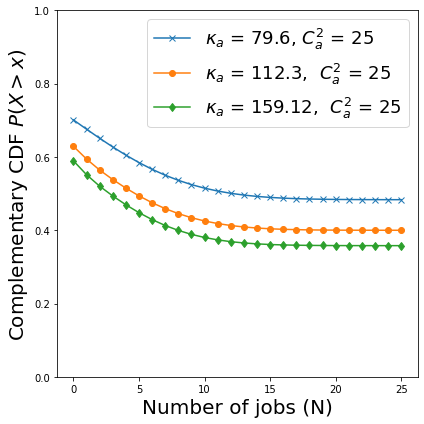

In [89]:
lam1_arr = [171.9911  , 1.25607, 0.9915]
lam2_arr = [0.0307, 0.02149, 0.01894]
p_arr = [0.92340, 0.96273, 0.971]

counter = 0
plt.figure(figsize=(6,6))
while counter < len(p_arr) : 
    lam1 = lam1_arr[counter]
    lam2 = lam2_arr[counter]
    p = p_arr[counter]

    mu1 = 2.04463
    mu2 = 0.15960
    q =  0.7815

    b1 = mu1*(1-q)
    b2 = mu2*(1-q)
    b3 = mu1*q
    b4 = mu2*q
    f1 = lam1*(1-p)
    f2 = lam2*(1-p)
    f3 = lam1*p
    f4 = lam2*p
    
    #Initializing forward, backward and initial arrays
    L_0 = np.transpose(np.array([[-(lam1), 0],
                   [0, -(lam2)]]))
    #print("L :", L_0)
    #F_0 = np.array([[lam1*p*q, lam1*(1-p)*q, lam1*p*(1-q), lam1*(1-p)*(1-q)],
    #             [lam2*(1-p)*(1-q), lam2*p*(1-q), lam2*p*q, lam2*(1-p)*q]])
    F_0 = np.array([[lam1*p*q, lam1*(1-p)*q, lam1*p*(1-q), lam1*(1-p)*(1-q)],
                  [lam2*(p)*(q), lam2*(1-p)*(q), lam2*(p)*(1-q), lam2*(1-p)*(1-q)]])
                   #[lam2*(1-p)*(1-q), lam2*(p)*(1-q), lam2*(1-p)*(q), lam2*(p)*(q)]])
    #print("F_0 :",F_0)
    B_0 = np.array([[mu1, 0],
                   [mu1, 0],
                   [0, mu2],
                   [0, mu2]])
    #print(B_0)
    L = np.array([[-(lam1 + mu1), 0, 0, 0],
                 [0, -(lam2 + mu1), 0, 0],
                 [0, 0, -(lam1 + mu2), 0],
                 [0, 0, 0, -(lam2 + mu2)]])
    L1 = np.array([[-(lam2 + mu2), 0, 0, 0],
                 [0, -(lam2 + mu2), 0, 0],
                 [0, 0, -(lam1 + mu2), 0],
                 [0, 0, 0, -(lam2 + mu2)]])
    #print("L :",L)
    #print(L1)
    F = np.array([[f3, f1, 0, 0],
                 [f4, f2, 0, 0],
                 [0, 0, f3, f1],
                 [0, 0, f4, f2]])
    #print("F :",F)
    B = np.array([[b3, 0, b1, 0],
                 [0, b3, 0, b1],
                 [b4, 0, b2, 0],
                 [0, b4, 0, b2]])
    B1 = np.array([[mu1*(q), 0, mu1*(1-q), 0],
                 [0, mu1*(q), 0, mu1*(1-q)],
                 [mu2*(q), 0, mu2*(1-q), 0],
                 [0, mu2*(q), 0, mu2*(1-q)]])
    #print("B :",B)
    #print(B1)
    R_0 = np.zeros((4, 4))
    #print(R_0)
    
    # Computing matrix R
    R_prev = R_0
    n = 0
    flag = 0

    while flag == 0 :
        diff = []
        if n > 0:
            R_prev = R

        R_2 = np.matmul(R_prev,R_prev)
        R_mid = -(np.matmul(R_2,B) + F)
        #print(R_mid)
        R = np.matmul(R_mid, np.linalg.inv(L))

        for (i,j) in zip(R_prev, R) :
            for (k,l) in zip(i,j) :
                diff.append(abs(k-l))

        max = np.max(diff)
        #print("Max is", max)
        if (max < 10**-7) :

            flag =1
            break
        n += 1

    #Computing steady state distribution for state 0 and 1

    #Creating (I - R)^-1 = psi
    I = np.identity(4)
    psi_full = np.linalg.inv(I - R)
    psi = np.matmul(psi_full,np.ones((4,1), dtype=np.int64))
    psi = np.vstack([np.ones((2,1), dtype=np.int64), psi])
    print(psi)

    #Creating L + RB
    RB = np.matmul(R, B)
    LRB = np.add(L, RB)
    print(LRB)

    #Creating stacked version of [F_0  L+RB]T = phi
    phi = np.vstack([F_0, LRB])
    print(phi)

    #Solving for pi_0 and pi_1
    A = np.array([0, -(lam2), 0, 0, mu2, mu2])
    A = A[..., None] 

    A = np.hstack([psi,A, phi])
    b = np.array([1, 0, 0, 0, 0, 0])
    print(A,b)
    """
    steady_pi = np.linalg.solve(np.transpose(A), b)
    print(steady_pi)
    """
    steady_pi = np.matmul(b, np.linalg.inv(A)) 
    #print(type(steady_pi))
    print(steady_pi)
    
    steady_pi = steady_pi.tolist()    
    steady_pi = [[steady_pi[0], steady_pi[1]], [steady_pi[2], steady_pi[3], steady_pi[4], steady_pi[5]]]
    steady_prob_unified = []
    
    steady_prob_unified_stored = []
    steady_pi_stored = []

    steady_pi_stored , steady_prob_unified_stored = compute_pi_1(steady_pi)
    
    CDF_arr = compute_CDF(steady_prob_unified_stored) 
    com_CDF_arr = complementary_compute_CDF(CDF_arr)
    
    
    
    if counter == 0 :
        #plt.figure(figsize=(6,6))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 12.8, ST Kurt = 26.169, CVa = 2")
        plt.xlabel("Number of requests in system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "x", label = r"$\kappa_a$ = 79.6, $C_a^2$ = 25")
        plt.ylim(0,1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)
        
        plt.legend(prop = { "size": 18 })
    elif counter == 1 :
        #plt.figure(figsize=(6,6))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 159.55, ST Kurt = 26.169, CVa = 4")
        plt.xlabel("Steady state #requests in a $H_2/H_2/1$ system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "o", label = r"$\kappa_a$ = 112.3,  $C_a^2$ = 25")
        plt.ylim(0,1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)
        
        plt.legend(prop = { "size": 18 })
        
    elif counter == 2 :
        #plt.figure(figsize=(6,6))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 206.68, ST Kurt = 26.169, CVa = 25")
        plt.xlabel("Steady state #requests in a $H_2/H_2/1$ system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "d", label = r"$\kappa_a$ = 159.12,  $C_a^2$ = 25")
        plt.ylim(0,1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)

        plt.legend(prop = { "size": 18 })
    
    plt.tight_layout()
    plt.savefig("Complementary_CDF_CVa.5_2server.pdf", dpi = 200, bbox_inches = "tight")
    
    
    counter += 1

# Now , keep the IAT params fixed and investigate how kurt of ST dist impacts

p = 0.747565
lam1 = 1.387431
lam2 = 0.128715

Kurt for this IAT = 22.619 and CV for this = 2


[[ 1.        ]
 [ 1.        ]
 [ 5.11003472]
 [ 1.38129689]
 [10.45719643]
 [ 1.87736474]]
[[-1.84606820e+00  7.36948663e-01  2.05760497e-02  2.50704281e-02]
 [ 5.61119361e-02 -1.12381967e+00  1.90888501e-03  2.32583830e-03]
 [ 3.70163352e-01  9.71620836e-01 -1.73724833e+00  3.30537954e-02]
 [ 3.43408615e-02  9.01393842e-02  1.16824976e-03 -4.88058527e-01]]
[[ 1.00307114e+00  3.38713375e-01  3.41237107e-02  1.15227692e-02]
 [ 9.30570979e-02  3.14231786e-02  3.16573107e-03  1.06899243e-03]
 [-1.84606820e+00  7.36948663e-01  2.05760497e-02  2.50704281e-02]
 [ 5.61119361e-02 -1.12381967e+00  1.90888501e-03  2.32583830e-03]
 [ 3.70163352e-01  9.71620836e-01 -1.73724833e+00  3.30537954e-02]
 [ 3.43408615e-02  9.01393842e-02  1.16824976e-03 -4.88058527e-01]]
[[ 1.00000000e+00  0.00000000e+00  1.00307114e+00  3.38713375e-01
   3.41237107e-02  1.15227692e-02]
 [ 1.00000000e+00 -1.28715000e-01  9.30570979e-02  3.14231786e-02
   3.16573107e-03  1.06899243e-03]
 [ 5.11003472e+00  0.00000000e+00 -

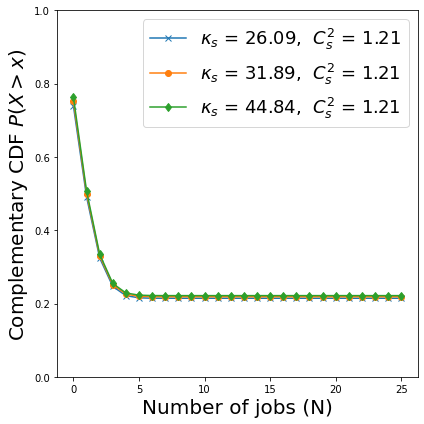

In [57]:
mu1_arr = [1.063473 , 1.0492, 1.03471]
mu2_arr = [0.36241, 0.3090,0.242138]
q_arr = [0.9671, 0.9794, 0.9893]

counter = 0
plt.figure(figsize=(6,6))
while counter < len(p_arr) : 
    lam1 = 1.387431
    lam2 = 0.128715
    p = 0.747565

    mu1 = mu1_arr[counter]
    mu2 = mu2_arr[counter]
    q =  q_arr[counter]

    b1 = mu1*(1-q)
    b2 = mu2*(1-q)
    b3 = mu1*q
    b4 = mu2*q
    f1 = lam1*(1-p)
    f2 = lam2*(1-p)
    f3 = lam1*p
    f4 = lam2*p
    
    #Initializing forward, backward and initial arrays
    L_0 = np.transpose(np.array([[-(lam1), 0],
                   [0, -(lam2)]]))
    #print("L :", L_0)
    #F_0 = np.array([[lam1*p*q, lam1*(1-p)*q, lam1*p*(1-q), lam1*(1-p)*(1-q)],
    #             [lam2*(1-p)*(1-q), lam2*p*(1-q), lam2*p*q, lam2*(1-p)*q]])
    F_0 = np.array([[lam1*p*q, lam1*(1-p)*q, lam1*p*(1-q), lam1*(1-p)*(1-q)],
                  [lam2*(p)*(q), lam2*(1-p)*(q), lam2*(p)*(1-q), lam2*(1-p)*(1-q)]])
                   #[lam2*(1-p)*(1-q), lam2*(p)*(1-q), lam2*(1-p)*(q), lam2*(p)*(q)]])
    #print("F_0 :",F_0)
    B_0 = np.array([[mu1, 0],
                   [mu1, 0],
                   [0, mu2],
                   [0, mu2]])
    #print(B_0)
    L = np.array([[-(lam1 + mu1), 0, 0, 0],
                 [0, -(lam2 + mu1), 0, 0],
                 [0, 0, -(lam1 + mu2), 0],
                 [0, 0, 0, -(lam2 + mu2)]])
    L1 = np.array([[-(lam2 + mu2), 0, 0, 0],
                 [0, -(lam2 + mu2), 0, 0],
                 [0, 0, -(lam1 + mu2), 0],
                 [0, 0, 0, -(lam2 + mu2)]])
    #print("L :",L)
    #print(L1)
    F = np.array([[f3, f1, 0, 0],
                 [f4, f2, 0, 0],
                 [0, 0, f3, f1],
                 [0, 0, f4, f2]])
    #print("F :",F)
    B = np.array([[b3, 0, b1, 0],
                 [0, b3, 0, b1],
                 [b4, 0, b2, 0],
                 [0, b4, 0, b2]])
    B1 = np.array([[mu1*(q), 0, mu1*(1-q), 0],
                 [0, mu1*(q), 0, mu1*(1-q)],
                 [mu2*(q), 0, mu2*(1-q), 0],
                 [0, mu2*(q), 0, mu2*(1-q)]])
    #print("B :",B)
    #print(B1)
    R_0 = np.zeros((4, 4))
    #print(R_0)
    
    # Computing matrix R
    R_prev = R_0
    n = 0
    flag = 0

    while flag == 0 :
        diff = []
        if n > 0:
            R_prev = R

        R_2 = np.matmul(R_prev,R_prev)
        R_mid = -(np.matmul(R_2,B) + F)
        #print(R_mid)
        R = np.matmul(R_mid, np.linalg.inv(L))

        for (i,j) in zip(R_prev, R) :
            for (k,l) in zip(i,j) :
                diff.append(abs(k-l))

        max = np.max(diff)
        #print("Max is", max)
        if (max < 10**-7) :

            flag =1
            break
        n += 1

    #Computing steady state distribution for state 0 and 1

    #Creating (I - R)^-1 = psi
    I = np.identity(4)
    psi_full = np.linalg.inv(I - R)
    psi = np.matmul(psi_full,np.ones((4,1), dtype=np.int64))
    psi = np.vstack([np.ones((2,1), dtype=np.int64), psi])
    print(psi)

    #Creating L + RB
    RB = np.matmul(R, B)
    LRB = np.add(L, RB)
    print(LRB)

    #Creating stacked version of [F_0  L+RB]T = phi
    phi = np.vstack([F_0, LRB])
    print(phi)

    #Solving for pi_0 and pi_1
    A = np.array([0, -(lam2), 0, 0, mu2, mu2])
    A = A[..., None] 

    A = np.hstack([psi,A, phi])
    b = np.array([1, 0, 0, 0, 0, 0])
    print(A,b)
    """
    steady_pi = np.linalg.solve(np.transpose(A), b)
    print(steady_pi)
    """
    steady_pi = np.matmul(b, np.linalg.inv(A)) 
    #print(type(steady_pi))
    print(steady_pi)
    
    steady_pi = steady_pi.tolist()    
    steady_pi = [[steady_pi[0], steady_pi[1]], [steady_pi[2], steady_pi[3], steady_pi[4], steady_pi[5]]]
    steady_prob_unified = []
    
    steady_prob_unified_stored = []
    steady_pi_stored = []

    steady_pi_stored , steady_prob_unified_stored = compute_pi_1(steady_pi)
    
    CDF_arr = compute_CDF(steady_prob_unified_stored) 
    com_CDF_arr = complementary_compute_CDF(CDF_arr)
    
    
    
    if counter == 0 :
        #plt.figure(figsize=(8,8))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 22.619, ST Kurt = 47.8, CVs = 2")
        plt.xlabel("Number of requests in system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "x", label = r"$\kappa_s$ = 26.09,  $C_s^2$ = 1.21")
        plt.ylim(0, 1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)
        
        plt.legend(prop = { "size": 18 })
    elif counter == 1 :
        #plt.figure(figsize=(8,8))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 22.619, ST Kurt = 119.908, CVs = 64")
        plt.xlabel("Number of requests in system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "o", label = r"$\kappa_s$ = 31.89,  $C_s^2$ = 1.21")
        plt.ylim(0, 1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)
        
        
        plt.legend(prop = { "size": 18 })
    elif counter == 2 :
        #plt.figure(figsize=(8,8))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 22.619, ST Kurt = 119.908, CVs = 2")
        plt.xlabel("Number of requests in system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "d", label = r"$\kappa_s$ = 44.84,  $C_s^2$ = 1.21")
        plt.ylim(0, 1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)
        
        
        plt.legend(prop = { "size": 18 })
    
    plt.tight_layout()
    plt.savefig("Complementary_CDF_CVs1.1.pdf", dpi = 200, bbox_inches = "tight")
    
    
    counter += 1

[[ 1.        ]
 [ 1.        ]
 [ 3.51489492]
 [ 1.23331229]
 [14.35871077]
 [ 2.23931674]]
[[-2.50498598  0.54087268  0.09045406  0.07145912]
 [ 0.06351601 -1.88073706  0.00839162  0.00662942]
 [ 0.30467569  0.92084111 -1.5760178   0.12165986]
 [ 0.02826543  0.08542844  0.00373438 -0.34626835]]
[[ 0.91615422  0.30936359  0.12104064  0.04087256]
 [ 0.08499362  0.02870033  0.0112292   0.00379184]
 [-2.50498598  0.54087268  0.09045406  0.07145912]
 [ 0.06351601 -1.88073706  0.00839162  0.00662942]
 [ 0.30467569  0.92084111 -1.5760178   0.12165986]
 [ 0.02826543  0.08542844  0.00373438 -0.34626835]]
[[ 1.00000000e+00  0.00000000e+00  9.16154216e-01  3.09363586e-01
   1.21040640e-01  4.08725581e-02]
 [ 1.00000000e+00 -1.28715000e-01  8.49936248e-02  2.87003347e-02
   1.12292041e-02  3.79183636e-03]
 [ 3.51489492e+00  0.00000000e+00 -2.50498598e+00  5.40872678e-01
   9.04540630e-02  7.14591209e-02]
 [ 1.23331229e+00  0.00000000e+00  6.35160118e-02 -1.88073706e+00
   8.39162071e-03  6.6294185

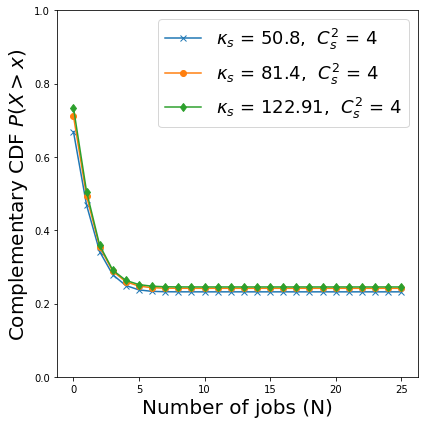

In [60]:
mu1_arr = [1.8022 , 1.48731, 1.33813]
mu2_arr = [0.22884, 0.179273, 0.1441]
q_arr = [0.8833, 0.9332, 0.95916]

counter = 0
plt.figure(figsize=(6,6))
while counter < len(p_arr) : 
    lam1 = 1.387431
    lam2 = 0.128715
    p = 0.747565

    mu1 = mu1_arr[counter]
    mu2 = mu2_arr[counter]
    q =  q_arr[counter]

    b1 = mu1*(1-q)
    b2 = mu2*(1-q)
    b3 = mu1*q
    b4 = mu2*q
    f1 = lam1*(1-p)
    f2 = lam2*(1-p)
    f3 = lam1*p
    f4 = lam2*p
    
    #Initializing forward, backward and initial arrays
    L_0 = np.transpose(np.array([[-(lam1), 0],
                   [0, -(lam2)]]))
    #print("L :", L_0)
    #F_0 = np.array([[lam1*p*q, lam1*(1-p)*q, lam1*p*(1-q), lam1*(1-p)*(1-q)],
    #             [lam2*(1-p)*(1-q), lam2*p*(1-q), lam2*p*q, lam2*(1-p)*q]])
    F_0 = np.array([[lam1*p*q, lam1*(1-p)*q, lam1*p*(1-q), lam1*(1-p)*(1-q)],
                  [lam2*(p)*(q), lam2*(1-p)*(q), lam2*(p)*(1-q), lam2*(1-p)*(1-q)]])
                   #[lam2*(1-p)*(1-q), lam2*(p)*(1-q), lam2*(1-p)*(q), lam2*(p)*(q)]])
    #print("F_0 :",F_0)
    B_0 = np.array([[mu1, 0],
                   [mu1, 0],
                   [0, mu2],
                   [0, mu2]])
    #print(B_0)
    L = np.array([[-(lam1 + mu1), 0, 0, 0],
                 [0, -(lam2 + mu1), 0, 0],
                 [0, 0, -(lam1 + mu2), 0],
                 [0, 0, 0, -(lam2 + mu2)]])
    L1 = np.array([[-(lam2 + mu2), 0, 0, 0],
                 [0, -(lam2 + mu2), 0, 0],
                 [0, 0, -(lam1 + mu2), 0],
                 [0, 0, 0, -(lam2 + mu2)]])
    #print("L :",L)
    #print(L1)
    F = np.array([[f3, f1, 0, 0],
                 [f4, f2, 0, 0],
                 [0, 0, f3, f1],
                 [0, 0, f4, f2]])
    #print("F :",F)
    B = np.array([[b3, 0, b1, 0],
                 [0, b3, 0, b1],
                 [b4, 0, b2, 0],
                 [0, b4, 0, b2]])
    B1 = np.array([[mu1*(q), 0, mu1*(1-q), 0],
                 [0, mu1*(q), 0, mu1*(1-q)],
                 [mu2*(q), 0, mu2*(1-q), 0],
                 [0, mu2*(q), 0, mu2*(1-q)]])
    #print("B :",B)
    #print(B1)
    R_0 = np.zeros((4, 4))
    #print(R_0)
    
    # Computing matrix R
    R_prev = R_0
    n = 0
    flag = 0

    while flag == 0 :
        diff = []
        if n > 0:
            R_prev = R

        R_2 = np.matmul(R_prev,R_prev)
        R_mid = -(np.matmul(R_2,B) + F)
        #print(R_mid)
        R = np.matmul(R_mid, np.linalg.inv(L))

        for (i,j) in zip(R_prev, R) :
            for (k,l) in zip(i,j) :
                diff.append(abs(k-l))

        max = np.max(diff)
        #print("Max is", max)
        if (max < 10**-7) :

            flag =1
            break
        n += 1

    #Computing steady state distribution for state 0 and 1

    #Creating (I - R)^-1 = psi
    I = np.identity(4)
    psi_full = np.linalg.inv(I - R)
    psi = np.matmul(psi_full,np.ones((4,1), dtype=np.int64))
    psi = np.vstack([np.ones((2,1), dtype=np.int64), psi])
    print(psi)

    #Creating L + RB
    RB = np.matmul(R, B)
    LRB = np.add(L, RB)
    print(LRB)

    #Creating stacked version of [F_0  L+RB]T = phi
    phi = np.vstack([F_0, LRB])
    print(phi)

    #Solving for pi_0 and pi_1
    A = np.array([0, -(lam2), 0, 0, mu2, mu2])
    A = A[..., None] 

    A = np.hstack([psi,A, phi])
    b = np.array([1, 0, 0, 0, 0, 0])
    print(A,b)
    """
    steady_pi = np.linalg.solve(np.transpose(A), b)
    print(steady_pi)
    """
    steady_pi = np.matmul(b, np.linalg.inv(A)) 
    #print(type(steady_pi))
    print(steady_pi)
    
    steady_pi = steady_pi.tolist()    
    steady_pi = [[steady_pi[0], steady_pi[1]], [steady_pi[2], steady_pi[3], steady_pi[4], steady_pi[5]]]
    steady_prob_unified = []
    
    steady_prob_unified_stored = []
    steady_pi_stored = []

    steady_pi_stored , steady_prob_unified_stored = compute_pi_1(steady_pi)
    
    CDF_arr = compute_CDF(steady_prob_unified_stored) 
    com_CDF_arr = complementary_compute_CDF(CDF_arr)
    
    
    
    if counter == 0 :
        #plt.figure(figsize=(8,8))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 22.619, ST Kurt = 47.8, CVs = 2")
        plt.xlabel("Number of requests in system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "x", label = r"$\kappa_s$ = 50.8,  $C_s^2$ = 4")
        plt.ylim(0, 1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)
        
        plt.legend(prop = { "size": 18 })
    elif counter == 1 :
        #plt.figure(figsize=(8,8))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 22.619, ST Kurt = 119.908, CVs = 64")
        plt.xlabel("Number of requests in system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "o", label = r"$\kappa_s$ = 81.4,  $C_s^2$ = 4")
        plt.ylim(0, 1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)
        
        
        plt.legend(prop = { "size": 18 })
    elif counter == 2 :
        #plt.figure(figsize=(8,8))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 22.619, ST Kurt = 119.908, CVs = 2")
        plt.xlabel("Number of requests in system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "d", label = r"$\kappa_s$ = 122.91,  $C_s^2$ = 4")
        plt.ylim(0, 1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)
        
        
        plt.legend(prop = { "size": 18 })
    
    plt.tight_layout()
    plt.savefig("Complementary_CDF_CVs2.pdf", dpi = 200, bbox_inches = "tight")
    
    
    counter += 1

[[ 1.        ]
 [ 1.        ]
 [ 2.25065045]
 [ 1.11602557]
 [45.29884379]
 [ 5.10970036]]
[[-3.68826523e+00  4.64943762e-01  3.08970842e-02  1.64143103e-02]
 [ 8.11919646e-02 -3.26159115e+00  2.86638989e-03  1.52279137e-03]
 [ 2.56621489e-01  1.08349298e+00 -1.43238227e+00  3.82514864e-02]
 [ 2.38073353e-02  1.00518007e-01  8.40490872e-04 -1.79177326e-01]]
[[ 1.00182651e+00  3.38293092e-01  3.53683446e-02  1.19430525e-02]
 [ 9.29416305e-02  3.13841880e-02  3.28119847e-03  1.10798303e-03]
 [-3.68826523e+00  4.64943762e-01  3.08970842e-02  1.64143103e-02]
 [ 8.11919646e-02 -3.26159115e+00  2.86638989e-03  1.52279137e-03]
 [ 2.56621489e-01  1.08349298e+00 -1.43238227e+00  3.82514864e-02]
 [ 2.38073353e-02  1.00518007e-01  8.40490872e-04 -1.79177326e-01]]
[[ 1.00000000e+00  0.00000000e+00  1.00182651e+00  3.38293092e-01
   3.53683446e-02  1.19430525e-02]
 [ 1.00000000e+00 -1.28715000e-01  9.29416305e-02  3.13841880e-02
   3.28119847e-03  1.10798303e-03]
 [ 2.25065045e+00  0.00000000e+00 -

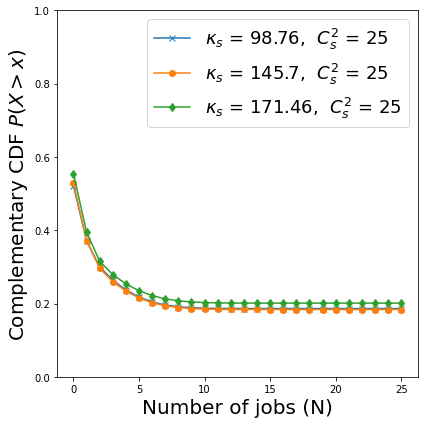

In [93]:
mu1_arr = [3.17601 , 2.8446, 2.49005]
mu2_arr = [0.054011, 0.051269, 0.047498]
q_arr = [0.9659, 0.969144, 0.97102]

counter = 0
plt.figure(figsize=(6,6))
while counter < len(p_arr) : 
    lam1 = 1.387431
    lam2 = 0.128715
    p = 0.747565

    mu1 = mu1_arr[counter]
    mu2 = mu2_arr[counter]
    q =  q_arr[counter]

    b1 = mu1*(1-q)
    b2 = mu2*(1-q)
    b3 = mu1*q
    b4 = mu2*q
    f1 = lam1*(1-p)
    f2 = lam2*(1-p)
    f3 = lam1*p
    f4 = lam2*p
    
    #Initializing forward, backward and initial arrays
    L_0 = np.transpose(np.array([[-(lam1), 0],
                   [0, -(lam2)]]))
    #print("L :", L_0)
    #F_0 = np.array([[lam1*p*q, lam1*(1-p)*q, lam1*p*(1-q), lam1*(1-p)*(1-q)],
    #             [lam2*(1-p)*(1-q), lam2*p*(1-q), lam2*p*q, lam2*(1-p)*q]])
    F_0 = np.array([[lam1*p*q, lam1*(1-p)*q, lam1*p*(1-q), lam1*(1-p)*(1-q)],
                  [lam2*(p)*(q), lam2*(1-p)*(q), lam2*(p)*(1-q), lam2*(1-p)*(1-q)]])
                   #[lam2*(1-p)*(1-q), lam2*(p)*(1-q), lam2*(1-p)*(q), lam2*(p)*(q)]])
    #print("F_0 :",F_0)
    B_0 = np.array([[mu1, 0],
                   [mu1, 0],
                   [0, mu2],
                   [0, mu2]])
    #print(B_0)
    L = np.array([[-(lam1 + mu1), 0, 0, 0],
                 [0, -(lam2 + mu1), 0, 0],
                 [0, 0, -(lam1 + mu2), 0],
                 [0, 0, 0, -(lam2 + mu2)]])
    L1 = np.array([[-(lam2 + mu2), 0, 0, 0],
                 [0, -(lam2 + mu2), 0, 0],
                 [0, 0, -(lam1 + mu2), 0],
                 [0, 0, 0, -(lam2 + mu2)]])
    #print("L :",L)
    #print(L1)
    F = np.array([[f3, f1, 0, 0],
                 [f4, f2, 0, 0],
                 [0, 0, f3, f1],
                 [0, 0, f4, f2]])
    #print("F :",F)
    B = np.array([[b3, 0, b1, 0],
                 [0, b3, 0, b1],
                 [b4, 0, b2, 0],
                 [0, b4, 0, b2]])
    B1 = np.array([[mu1*(q), 0, mu1*(1-q), 0],
                 [0, mu1*(q), 0, mu1*(1-q)],
                 [mu2*(q), 0, mu2*(1-q), 0],
                 [0, mu2*(q), 0, mu2*(1-q)]])
    #print("B :",B)
    #print(B1)
    R_0 = np.zeros((4, 4))
    #print(R_0)
    
    # Computing matrix R
    R_prev = R_0
    n = 0
    flag = 0

    while flag == 0 :
        diff = []
        if n > 0:
            R_prev = R

        R_2 = np.matmul(R_prev,R_prev)
        R_mid = -(np.matmul(R_2,B) + F)
        #print(R_mid)
        R = np.matmul(R_mid, np.linalg.inv(L))

        for (i,j) in zip(R_prev, R) :
            for (k,l) in zip(i,j) :
                diff.append(abs(k-l))

        max = np.max(diff)
        #print("Max is", max)
        if (max < 10**-7) :

            flag =1
            break
        n += 1

    #Computing steady state distribution for state 0 and 1

    #Creating (I - R)^-1 = psi
    I = np.identity(4)
    psi_full = np.linalg.inv(I - R)
    psi = np.matmul(psi_full,np.ones((4,1), dtype=np.int64))
    psi = np.vstack([np.ones((2,1), dtype=np.int64), psi])
    print(psi)

    #Creating L + RB
    RB = np.matmul(R, B)
    LRB = np.add(L, RB)
    print(LRB)

    #Creating stacked version of [F_0  L+RB]T = phi
    phi = np.vstack([F_0, LRB])
    print(phi)

    #Solving for pi_0 and pi_1
    A = np.array([0, -(lam2), 0, 0, mu2, mu2])
    A = A[..., None] 

    A = np.hstack([psi,A, phi])
    b = np.array([1, 0, 0, 0, 0, 0])
    print(A,b)
    """
    steady_pi = np.linalg.solve(np.transpose(A), b)
    print(steady_pi)
    """
    steady_pi = np.matmul(b, np.linalg.inv(A)) 
    #print(type(steady_pi))
    print(steady_pi)
    
    steady_pi = steady_pi.tolist()    
    steady_pi = [[steady_pi[0], steady_pi[1]], [steady_pi[2], steady_pi[3], steady_pi[4], steady_pi[5]]]
    steady_prob_unified = []
    
    steady_prob_unified_stored = []
    steady_pi_stored = []

    steady_pi_stored , steady_prob_unified_stored = compute_pi_1(steady_pi)
    
    CDF_arr = compute_CDF(steady_prob_unified_stored) 
    com_CDF_arr = complementary_compute_CDF(CDF_arr)
    
    
    
    if counter == 0 :
        #plt.figure(figsize=(8,8))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 22.619, ST Kurt = 47.8, CVs = 2")
        plt.xlabel("Number of requests in system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "x", label = r"$\kappa_s$ = 98.76,  $C_s^2$ = 25")
        plt.ylim(0, 1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)
        
        plt.legend(prop = { "size": 18 })
    elif counter == 1 :
        #plt.figure(figsize=(8,8))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 22.619, ST Kurt = 119.908, CVs = 64")
        plt.xlabel("Number of requests in system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "o", label = r"$\kappa_s$ = 145.7,  $C_s^2$ = 25")
        plt.ylim(0, 1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)
        
        
        plt.legend(prop = { "size": 18 })
    elif counter == 2 :
        #plt.figure(figsize=(8,8))
        '''
        plt.subplot(1,2,1)
        plt.plot(CDF_arr, marker = "x", label = "IAT Kurt = 22.619, ST Kurt = 119.908, CVs = 2")
        plt.xlabel("Number of requests in system")
        plt.ylabel("CDF of the #requets in a H2/H2/1 system")
        plt.legend()
        plt.subplot(1,2,2)
        '''
        plt.plot(com_CDF_arr, marker = "d", label = r"$\kappa_s$ = 171.46,  $C_s^2$ = 25")
        plt.ylim(0, 1)
        plt.xlabel("Number of jobs (N)", fontsize = 20)
        plt.ylabel(r"Complementary CDF $P(X > x)$", fontsize = 20)
        
        
        plt.legend(prop = { "size": 18 })
    
    plt.tight_layout()
    plt.savefig("Complementary_CDF_CVs5_2server.pdf", dpi = 200, bbox_inches = "tight")
    
    
    counter += 1